# Handling Missing Data
## Categorical and Nnumeric Data
### Random Sample Imputation

### Numeric Data

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# using titanic for numeric examples
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
# missing value percentages
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [28]:
# separate input and output
x = df.drop(columns=['Survived'])
y = df['Survived']

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [30]:
# to observe the changes we create new columns
# both in train and test datasets
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [31]:
# x_train['Age_imputed'][x_train['Age_imputed'].isnull()] => these are all the places where the values are missing
x_train[x_train['Age_imputed'].isnull()]['Age_imputed'].shape
# remove shape to see the values

(148,)

In [32]:
# x_train['Age'].isnull().sum() are the randomly sampled numbers
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values.shape
# .values will return the sampled values from x_train['Age'] after dropping the missing values
# remove shape to see the values

(148,)

In [33]:
# replace Nan in 'Age_imputed' with random values from 'Age'
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

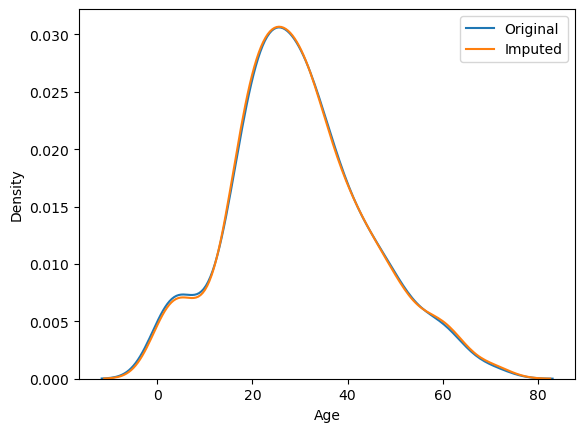

In [34]:
sns.kdeplot(x_train['Age'], label='Original')
sns.kdeplot(x_train['Age_imputed'], label='Imputed')

plt.legend()
plt.show()

In [35]:
# changes in variance
print('Original variable variance: ', x_train['Age'].var())
print('Variable after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variable after random imputation:  205.56572607954422


In [36]:
# checking covariance 
x_train[['Fare', 'Age', 'Age_imputed']].cov()
# since we introduced random values, the covariance droppped a little

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,50.551440
Age,71.512440,204.349513,204.349513
Age_imputed,50.551440,204.349513,205.565726


<Axes: >

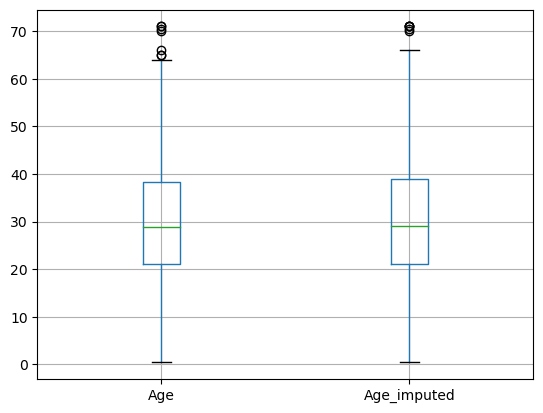

In [37]:
# checking outliers with boxplot
x_train[['Age', 'Age_imputed']].boxplot()
# note that the outliers didnt change much

Since we are using Randomness in our Algorithms. We need to make sure for the same imputs the random assumption does not change.

In [38]:
# sampled_value = x_train['Age'].dropna().sample(1, random_state = int(observation['Fare']))

### Categorical Data

In [39]:
# we are using the housing price data set for this demo
data = pd.read_csv('house-train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [40]:
data.isnull().mean()*100
# almost 50% of FireplaceQu is missing!

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [41]:
# select imput and output
x = data
y = data['SalePrice']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [43]:
# makiing new columns
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']

x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [44]:
# same as last time replace null values with random samples of remainig dataset
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_test['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

C:\Users\vivek\AppData\Local\Temp\ipykernel_2624\3083151478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
C:\Users\vivek\AppData\Local\Temp\ipykernel_2624\3083151478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values
C:\Users\vivek\AppData\Local\Temp\ipykernel_2624\3083151478.py:5: SettingWithCopyWarning: 
A val

In [45]:
temp = pd.concat(
    [
        x_train['GarageQual'].value_counts()/ len(x_train['GarageQual'].dropna()),
        x_train['GarageQual_imputed'].value_counts()/ len(x_train)
    ],
    axis=1
)

temp.columns = ['Original', 'Imputed']
temp
# this has the value counts as the percentage of all the values in the dataset
# original is divided with non null values
# imputed is divided with the length of the entire datasets

,Original,Imputed
TA,0.951043,0.952055
Fa,0.037171,0.035959
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


Note that there is very little change in the percentage of each category. This a good sign!

In [46]:
# similar opeartion on a column with large portion of missing values
temp = pd.concat(
    [
        x_train['FireplaceQu'].value_counts()/ len(x_train['FireplaceQu'].dropna()),
        x_train['FireplaceQu_imputed'].value_counts()/ len(data)
    ],
    axis=1
)

temp.columns = ['Original', 'Imputed']

temp

,Original,Imputed
Gd,0.494272,0.395890
TA,0.412439,0.326712
Fa,0.040917,0.033562
Po,0.027823,0.023288
Ex,0.024550,0.020548


Since we are seeing significant changes in the percentage of categories this is a RED FLAG and would deter the accuracy of the model if used!!

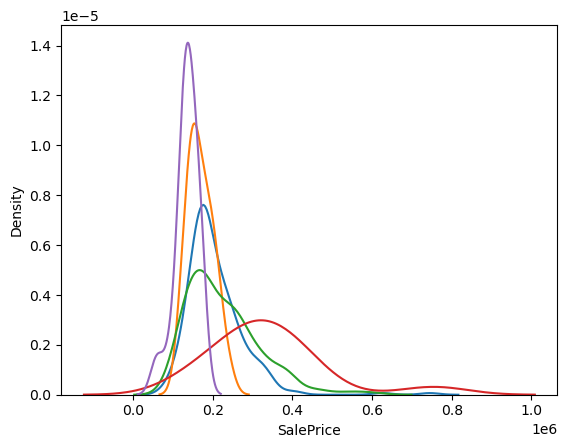

In [47]:
# Changes in PDF 
for category in x_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'])
plt.show()

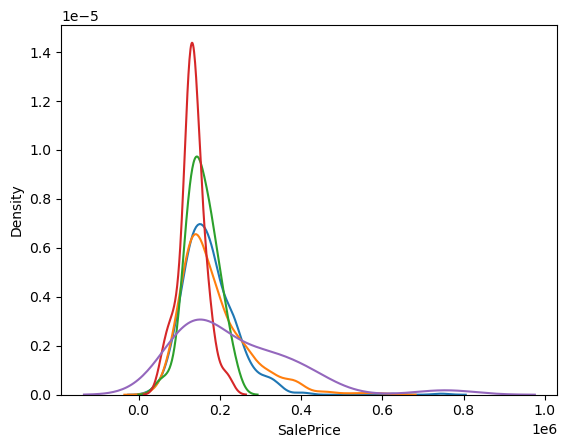

In [48]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'])
plt.show()
# note that the distribution is altered heavily
# this will severily impact Linear Algorithms!!